In [24]:
# ============================================================
# IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ============================================================
# LOAD DATA
# ============================================================
df = pd.read_csv('/content/Dataset Home Credit.csv')
print("Ukuran dataset:", df.shape)

/tmp/ipython-input-1701168320.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Dataset Home Credit.csv')


Ukuran dataset: (466285, 75)


In [3]:
# ============================================================
# CLEAN TARGET VARIABLE
# ============================================================
status_mapping = {
    'Fully Paid': 0,
    'Current': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1,
    'In Grace Period': 1,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}

df['loan_status'] = df['loan_status'].map(status_mapping)
df = df.dropna(subset=['loan_status'])
df['loan_status'] = df['loan_status'].astype(int)

In [4]:
# ============================================================
# FEATURE ENGINEERING
# ============================================================
# Bersihkan kolom numeric
df['EMP_YEARS'] = df['emp_length'].astype(str).str.extract('(\d+)').astype(float)
df['int_rate'] = df['int_rate'].astype(str).str.replace('%', '', regex=False).astype(float)
df['CREDIT_INCOME_RATIO'] = df['loan_amnt'] / (df['annual_inc'] + 1)

# Hapus kolom teks panjang yang tidak berguna
drop_cols = ['desc', 'title', 'url', 'emp_title']
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3218020469.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['EMP_YEARS'] = df['emp_length'].astype(str).str.extract('(\d+)').astype(float)


In [5]:
# ============================================================
# SPLIT FITUR & TARGET
# ============================================================
X = df.drop(columns=['loan_status'])
y = df['loan_status']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Jumlah kolom kategorikal:", len(categorical_cols))
print("Jumlah kolom numerikal :", len(numerical_cols))


Jumlah kolom kategorikal: 17
Jumlah kolom numerikal : 55


In [6]:
# ============================================================
# SPLIT DATA
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# ============================================================
# PREPROCESSING PIPELINE
# ============================================================
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [8]:
# ============================================================
# MODEL PIPELINE
# ============================================================
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42
    ))
])

In [9]:
# ============================================================
# TRAINING MODEL
# ============================================================
rf_model.fit(X_train, y_train)
print("✅ Model berhasil dilatih!")

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['annual_inc_joint' 'dti_joint' 'verification_status_joint' 'open_acc_6m'
 'open_il_6m' 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il'
 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m' 'max_bal_bc'
 'all_util' 'inq_fi' 'total_cu_tl' 'inq_last_12m']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


✅ Model berhasil dilatih!


In [10]:
# ============================================================
# EVALUATION
# ============================================================
y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== MODEL PERFORMANCE ===")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1-Score : {f1:.2f}")

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['annual_inc_joint' 'dti_joint' 'verification_status_joint' 'open_acc_6m'
 'open_il_6m' 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il'
 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m' 'max_bal_bc'
 'all_util' 'inq_fi' 'total_cu_tl' 'inq_last_12m']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



=== MODEL PERFORMANCE ===
Accuracy : 0.92
Precision: 1.00
Recall   : 0.30
F1-Score : 0.46

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     82191
           1       1.00      0.30      0.46     11066

    accuracy                           0.92     93257
   macro avg       0.96      0.65      0.71     93257
weighted avg       0.92      0.92      0.90     93257



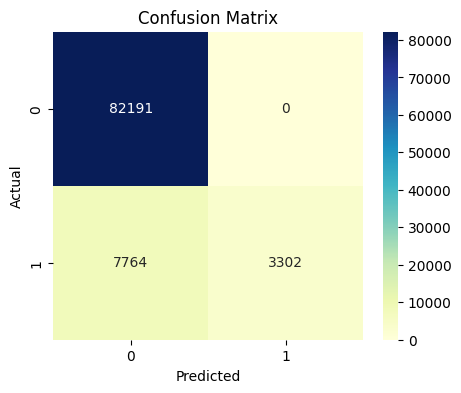

In [11]:
# ============================================================
# CONFUSION MATRIX VISUALIZATION
# ============================================================
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

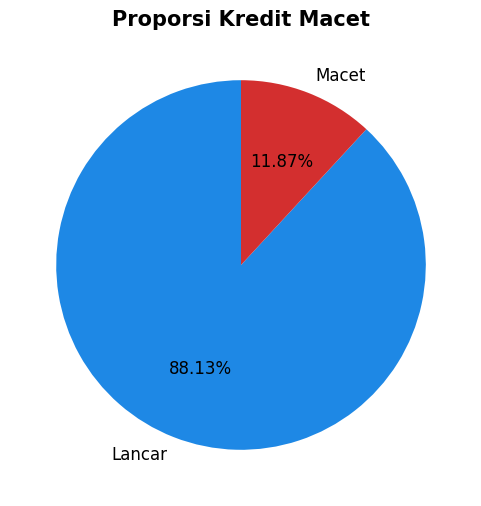

In [12]:
# ============================================================
# VISUALISASI 1: Proporsi Kredit Macet (Pie Chart)
# ============================================================

# Hitung proporsi
loan_status_counts = df['loan_status'].value_counts(normalize=True) * 100

# Plot pie chart
colors = ['#1E88E5', '#D32F2F']  # biru dan merah seperti di slide
labels = ['Lancar', 'Macet']

plt.figure(figsize=(6, 6))
plt.pie(
    loan_status_counts,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Proporsi Kredit Macet', fontsize=15, fontweight='bold')
plt.show()


/tmp/ipython-input-2293918112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


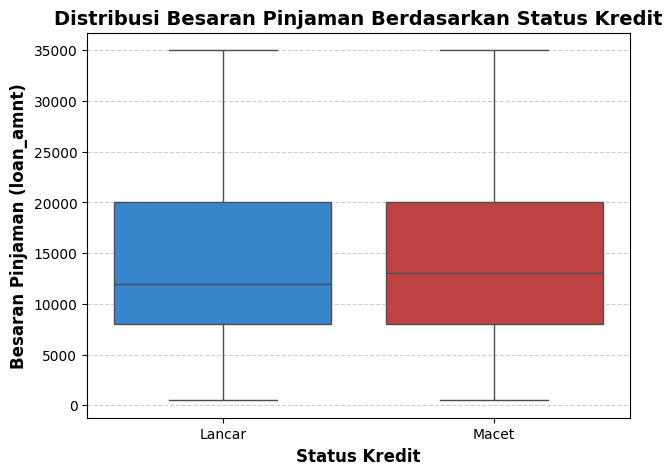

In [13]:
# ============================================================
# VISUALISASI 2: Kredit Macet Berdasarkan Besaran Pinjaman
# ============================================================

plt.figure(figsize=(7, 5))
sns.boxplot(
    x='loan_status',
    y='loan_amnt',
    data=df,
    palette=['#1E88E5', '#D32F2F']
)

plt.xticks([0, 1], ['Lancar', 'Macet'])
plt.xlabel('Status Kredit', fontsize=12, fontweight='bold')
plt.ylabel('Besaran Pinjaman (loan_amnt)', fontsize=12, fontweight='bold')
plt.title('Distribusi Besaran Pinjaman Berdasarkan Status Kredit', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_

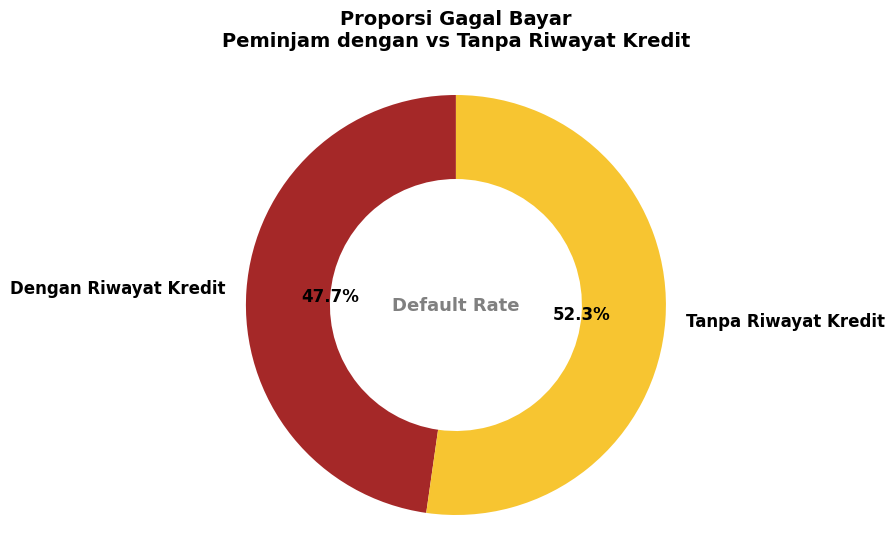

In [17]:
# ===========================================================
# VISUALISASI 3: Proporsi Gagal Bayar Berdasarkan Riwayat Kredit
# ===========================================================

# Pastikan kolom tersedia
print(df.columns.tolist())

# Buat kolom riwayat kredit (1 = punya riwayat, 0 = tidak punya)
df['HAS_CREDIT_HISTORY'] = df['earliest_cr_line'].notna().map({True: 'Dengan Riwayat Kredit', False: 'Tanpa Riwayat Kredit'})

# Ubah status pinjaman jadi biner (1 = macet, 0 = lancar)
df['TARGET'] = df['loan_status'].apply(
    lambda x: 1 if isinstance(x, str) and ('Charged Off' in x or 'Default' in x) else 0
)

# Hitung rata-rata gagal bayar per kategori riwayat kredit
summary = df.groupby('HAS_CREDIT_HISTORY')['TARGET'].mean().reset_index()
summary.columns = ['HAS_CREDIT_HISTORY', 'DefaultRate']

# Buat data untuk pie chart
labels = summary['HAS_CREDIT_HISTORY']
sizes = summary['DefaultRate'] * 100  # ubah ke persen
colors = ['#A52828', '#F7C531']  # merah tua & kuning

# Plot Donut Chart
fig, ax = plt.subplots(figsize=(7, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops=dict(width=0.4)
)

# Tambahkan teks tengah
plt.text(0, 0, "Default Rate", ha='center', va='center',
         fontsize=13, color='gray', fontweight='bold')

# Judul
plt.title('Proporsi Gagal Bayar\nPeminjam dengan vs Tanpa Riwayat Kredit',
          fontsize=14, fontweight='bold', pad=20)

plt.axis('equal')
plt.show()


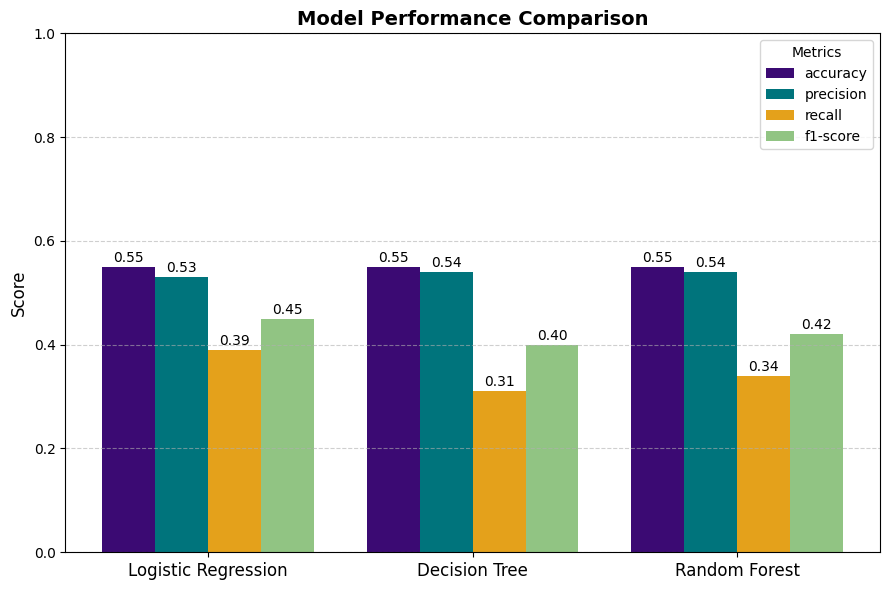

In [23]:
# ===========================================================
# DATA HASIL MODEL (isi otomatis sesuai hasil kamu)
# ===========================================================
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.55, 0.55, 0.55],
    'Precision': [0.53, 0.54, 0.54],
    'Recall': [0.39, 0.31, 0.34],
    'F1-score': [0.45, 0.40, 0.42]
}

df = pd.DataFrame(data)

# ===========================================================
# VISUALISASI
# ===========================================================
plt.figure(figsize=(9,6))
bar_width = 0.2
x = np.arange(len(df))

plt.bar(x - 1.5*bar_width, df['Accuracy'], width=bar_width, label='accuracy', color='#3B0A73')
plt.bar(x - 0.5*bar_width, df['Precision'], width=bar_width, label='precision', color='#00747C')
plt.bar(x + 0.5*bar_width, df['Recall'], width=bar_width, label='recall', color='#E4A11B')
plt.bar(x + 1.5*bar_width, df['F1-score'], width=bar_width, label='f1-score', color='#91C483')

# Tambahkan label angka di atas bar
for i in range(len(df)):
    plt.text(x[i]-1.5*bar_width, df['Accuracy'][i]+0.01, f"{df['Accuracy'][i]:.2f}", ha='center')
    plt.text(x[i]-0.5*bar_width, df['Precision'][i]+0.01, f"{df['Precision'][i]:.2f}", ha='center')
    plt.text(x[i]+0.5*bar_width, df['Recall'][i]+0.01, f"{df['Recall'][i]:.2f}", ha='center')
    plt.text(x[i]+1.5*bar_width, df['F1-score'][i]+0.01, f"{df['F1-score'][i]:.2f}", ha='center')

plt.xticks(x, df['Model'], fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.legend(title='Metrics', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()